In [1]:
#imports

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pathlib

In [2]:
class_names = ['Yes', 'No']
num_classes = len(class_names)
batch_size = 32
input_shape = (224, 224, 3)
AUTOTUNE = tf.data.experimental.AUTOTUNE

def one_hot_label(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

In [3]:
data_dir = pathlib.Path('D:/ADNI_png__')

# horizontal flip and normalization are on (for better training)
datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                       #rotation_range=10,
                                                       rescale=1./255,
                                                       validation_split=0.2
                                                       #brightness_range=(0.8,1.1),
                                                       #zoom_range=0.2,
                                                       #width_shift_range=0.1,
                                                       #height_shift_range=0.1
                                                      )

# load the training images with horizontal flipping
train_generator = datagen.flow_from_directory(
        data_dir,
        classes=class_names,
        class_mode='categorical',
        shuffle=True,
        batch_size=batch_size,
        target_size=input_shape[0:2],
        subset='training')

test_generator = datagen.flow_from_directory(
        data_dir,
        classes=class_names,
        class_mode='categorical',
        shuffle=True,
        batch_size=batch_size,
        target_size=input_shape[0:2],
        subset='validation')

Found 2929 images belonging to 2 classes.
Found 731 images belonging to 2 classes.


In [6]:
vgg = keras.applications.VGG19(
        include_top=False,
        input_shape=input_shape,
        pooling=max)

vgg.trainable = False

model = keras.models.Sequential([
    vgg,
    layers.Flatten(),
    layers.Dropout(0.6),
    layers.BatchNormalization(),
    layers.Dense(2, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25088)             100352    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50178     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
Total params: 20,174,920
Trainable params: 100,360
Non-trainable params: 20,074,560
____________________________________

In [7]:
epochs = 10
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(train_generator, validation_data=test_generator, epochs=epochs)

Epoch 1/10
92/92 [==============================] - 20s 212ms/step - loss: 0.3889 - accuracy: 0.9300 - val_loss: 0.3812 - val_accuracy: 0.9425
Epoch 2/10
92/92 [==============================] - 19s 210ms/step - loss: 0.3243 - accuracy: 0.9737 - val_loss: 0.3222 - val_accuracy: 0.9672
Epoch 3/10
92/92 [==============================] - 19s 211ms/step - loss: 0.2992 - accuracy: 0.9799 - val_loss: 0.3106 - val_accuracy: 0.9590
Epoch 4/10
92/92 [==============================] - 19s 212ms/step - loss: 0.2775 - accuracy: 0.9857 - val_loss: 0.2960 - val_accuracy: 0.9603
Epoch 5/10
92/92 [==============================] - 20s 212ms/step - loss: 0.2618 - accuracy: 0.9850 - val_loss: 0.2724 - val_accuracy: 0.9617
Epoch 6/10
92/92 [==============================] - 20s 212ms/step - loss: 0.2472 - accuracy: 0.9853 - val_loss: 0.2829 - val_accuracy: 0.9466
Epoch 7/10
92/92 [==============================] - 20s 213ms/step - loss: 0.2363 - accuracy: 0.9836 - val_loss: 0.2559 - val_accuracy: 0.9549

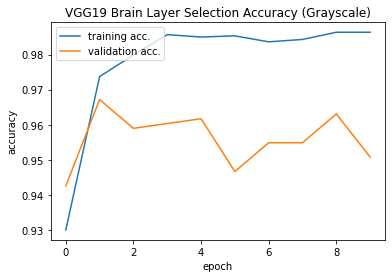

In [8]:
plt.title('VGG19 Brain Layer Selection Accuracy (Grayscale)')

plt.plot(history.history['accuracy'], label = "training acc.")
plt.plot(history.history['val_accuracy'], label = "validation acc.")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training acc.', 'validation acc.'], loc='upper left')

plt.savefig("../nii to png/VGG19_selection_adam_gray.png")
plt.show()


In [9]:
model.save("Brain Layer Selector")

INFO:tensorflow:Assets written to: Brain Layer Selector\assets


In [11]:
model = keras.models.load_model("Brain Layer Selector")
model.evaluate()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>